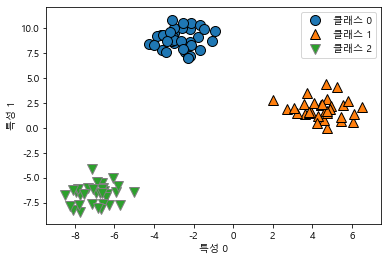

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [2]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression import 입력 후, run

logr = LogisticRegression().fit(X,y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.38486163  0.62874226]
 [ 0.74106233 -0.17664082]
 [-0.3562007  -0.45210144]]


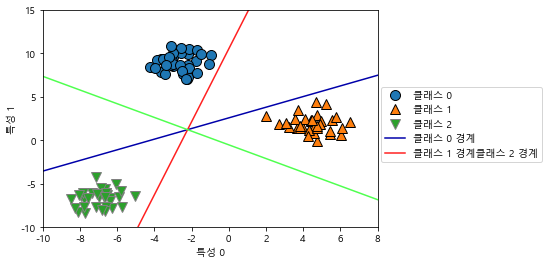

In [3]:
#로지스틱 회귀만 다중 클래스(multiclass)지원/ 많은 선형 분류 모델은 이진 분류만을 지원
#로지스틱 회귀를 사용했을 경우, 결정경계를 정확하게 나누어줌.

mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계'
            '클래스 2 경계'], loc=(1.01, 0.3))

print("계수 배열:\n", logr.coef_)

In [4]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ",linear_svm.coef_.shape)
print("절편 배열의 크기: ",linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열:
 [[-0.17492375  0.23140969]
 [ 0.4762179  -0.06937247]
 [-0.18913881 -0.20400495]]


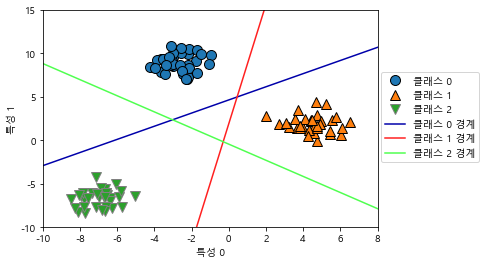

In [5]:
#'ovr' 중앙의 삼격형 영역은 세 분류기가 모두 나머지로 분류함. 이 영역의 데이터 포인트는 가장 가까운 직선의 클래스가 됨.
# 중앙 삼각형 제외 영역들은 어떤 포인트든 최종 분류기는 클래스 0에 속한 포인트임.(아래 그림 참고)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

print("계수 배열:\n", linear_svm.coef_)

Text(0, 0.5, '특성 1')

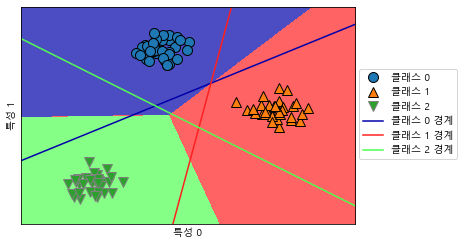

In [6]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_,linear_svm.intercept_,
                                    mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [7]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
iris_dataset = load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr = LogisticRegression().fit(X,y)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("\n테스트 세트의 정확도 :{:.2f}".format(logr.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도 :0.92
Number of mislabeled points out of a total %d points : %d (60, 5)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)

# ConvergenceWarning: Liblinear failed to converge, increase the number of iterations 시, max_iter 값을 조정해줌
#기본값은 1000으로 더 크게 조정해주면 경고 해제

linear_svm = LinearSVC(max_iter = 100000).fit(X,y)
linear_svm.fit(X_train,y_train)
y_pred = linear_svm.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("\n테스트 세트의 정확도 :{:.2f}".format(linear_svm.score(X_test,y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 20  3]
 [ 0  2 19]]

테스트 세트의 정확도 :0.92
Number of mislabeled points out of a total %d points : %d (60, 5)


In [9]:
print("predict:\n",logr.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[3.31268622e-04 1.22812782e-01 8.76855949e-01]
 [1.49073655e-02 9.68438212e-01 1.66544225e-02]
 [9.87117165e-01 1.28825421e-02 2.92956826e-07]
 [3.90825442e-06 4.07650401e-02 9.59231052e-01]
 [9.70874163e-01 2.91252303e-02 6.06746465e-07]
 [6.11405883e-06 1.15477255e-02 9.88446160e-01]
 [9.82263653e-01 1.77360426e-02 3.04444891e-07]
 [4.18438946e-03 7.27172728e-01 2.68642882e-01]
 [2.31528229e-03 7.61349534e-01 2.36335183e-01]
 [2.61148377e-02 9.31808632e-01 4.20765305e-02]
 [2.53911902e-04 3.18879994e-01 6.80866094e-01]
 [9.79354747e-03 7.84459210e-01 2.05747243e-01]
 [5.77051317e-03 8.37816949e-01 1.56412538e-01]
 [4.45378311e-03 7.90211050e-01 2.05335167e-01]
 [5.61604135e-03 7.61348215e-01 2.33035744e-01]
 [9.83304175e-01 1.66955727e-02 2.52473549e-07]
 [9.29207750e-03 7.96124175e-01 1.94583747e-01]
 [1.42542642e-02 8.99854691e-01 8.58910449e-02]
 [9.65387482e-01 3.46119197e-02 5.97992995e-07]
 [

In [10]:
#sklearn LinearSVC는 확률수치를 알 수 있는 model.predict_proba() 는 제공하지 않지만, decision_function() 을 제공한다.

print("predict:\n",linear_svm.predict(X_test[:30]))
print("probability:\n", linear_svm.decision_function(X_test[:30]))

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0]
probability:
 [[-2.76910175 -0.659013    1.70732141]
 [-1.46038592  0.67183461 -1.56352222]
 [ 1.72932807 -1.54980715 -6.97146609]
 [-3.15023735  0.28772674  1.13380072]
 [ 1.21839906 -0.78067054 -5.87636063]
 [-3.25270168 -0.83579701  2.38870066]
 [ 1.38285032 -1.03982344 -6.10411291]
 [-1.74242999 -0.29598897 -1.10598635]
 [-1.88148536  0.11177223 -1.02685046]
 [-1.32553427 -0.14155065 -1.61319264]
 [-2.7800277   0.59786297  1.0071188 ]
 [-1.60132176 -0.47729291 -1.14347644]
 [-1.86664895  0.22467022 -0.69104541]
 [-1.82221174 -0.06290404 -0.88770143]
 [-1.91079254 -0.04076615 -0.49605894]
 [ 1.40159802 -0.92299537 -6.15048299]
 [-1.80796174 -0.20982867 -0.56633484]
 [-1.82710105  0.27364434 -0.40553813]
 [ 1.0567827  -0.54095794 -5.4814366 ]
 [ 1.58733945 -1.48645448 -6.61014325]
 [-2.47808588 -0.39953457  1.122382  ]
 [-1.85523422 -0.31395339 -0.20024892]
 [ 0.84163765 -0.62631211 -5.06920862]
 [ 0.9718192  -0.

In [11]:
from sklearn.naive_bayes import GaussianNB

iris_dataset = load_iris()
X_train, X_test, y_train, y_test= train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test !=y_pred).sum()
accuracy = 1.0 -nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of misabeled points out of a total %d points : %d", X_test.shape[0],(y_test != y_pred).sum())

Accuracy:  1.0
Number of misabeled points out of a total %d points : %d 38 0


In [12]:
X_train, X_test, y_train, y_test= train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.4)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test !=y_pred).sum()
accuracy = 1.0 -nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of misabeled points out of a total %d points : %d", X_test.shape[0],(y_test != y_pred).sum())

Accuracy:  0.9333333333333333
Number of misabeled points out of a total %d points : %d 60 4


In [13]:
X_train, X_test, y_train, y_test= train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test !=y_pred).sum()
accuracy = 1.0 -nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of misabeled points out of a total %d points : %d", X_test.shape[0],(y_test != y_pred).sum())

Accuracy:  1.0
Number of misabeled points out of a total %d points : %d 45 0


In [14]:
#테스트사이즈 0.33일때, 정확도 높게 분류(0.96)
X_train, X_test, y_train, y_test= train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.33)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test !=y_pred).sum()
accuracy = 1.0 -nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of misabeled points out of a total %d points : %d", X_test.shape[0],(y_test != y_pred).sum())

Accuracy:  0.96
Number of misabeled points out of a total %d points : %d 50 2


In [15]:
X_train, X_test, y_train, y_test= train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.2)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test !=y_pred).sum()
accuracy = 1.0 -nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)
print("Number of misabeled points out of a total %d points : %d", X_test.shape[0],(y_test != y_pred).sum())

Accuracy:  0.9666666666666667
Number of misabeled points out of a total %d points : %d 30 1


In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
classifierGN = GaussianNB().fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(classifierGN.score(X_test, y_test)))

#logistic regression 의 테스트 세트 점수: 0.958로 암데이터에는 로지스틱회귀법이 더 적절하다고 판단됨.

훈련 세트 점수:0.946
테스트 세트 점수:0.937


In [17]:
#과대적합되어 테스트 세트에는 적합하지 않음.

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.840


In [18]:
#과대적합 방지를 위해 트리의 최대 깊이를 4로 제한함. 테스트 세트의 정확도가 좀 떨어지긴했으나, 나쁘진 않은 정도임.

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:0.933
테스트 세트 정확도:0.800


In [19]:
#depth의 깊이를 조정해보았으나, 테스트 세트 정확도는 계속 0.800으로 분류됨.

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=0)
tree = DecisionTreeClassifier(max_depth=2,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도:0.920
테스트 세트 정확도:0.800


In [20]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape:{}".format(X_train.shape), "X_test.shpe:{}".format(X_test.shape))
      
for max_depth in [1,4,8]:
      tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
      tree.fit(X_train, y_train)
      print("max_depth={}".format(max_depth))
      print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train,y_train)))
      print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))
        
#depth 최대 깊이 4인 경우가 가장 적절해보임.

X_train.shape:(426, 30) X_test.shpe:(143, 30)
max_depth=1
훈련 세트 정확도:0.923
테스트 세트 정확도:0.923
max_depth=4
훈련 세트 정확도:0.988
테스트 세트 정확도:0.951
max_depth=8
훈련 세트 정확도:1.000
테스트 세트 정확도:0.937


In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

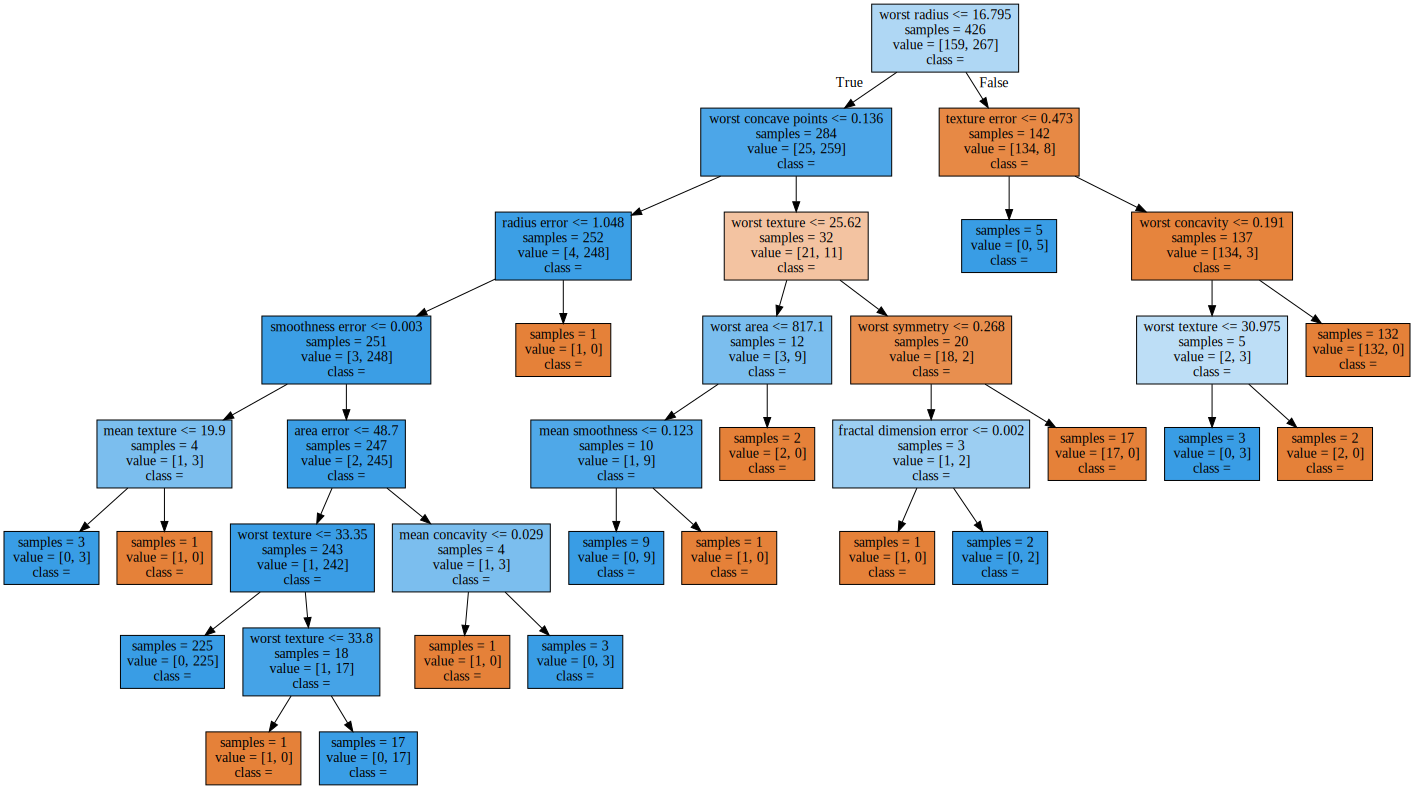

In [22]:
#No module named 'graphviz'
#http://www.graphviz.org/download/#windows에서 패키지를 다운로드 해줘야 정상적으로 run 가능
#다운로드 시, 설치 경로로 설정한 경로를 시스템 환경변수에 추가해줘야 함.
#다운로드 경로와 환경변수 경로가 다르면 계속해서 error 발생하니 주의해야 함.

import graphviz

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [23]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


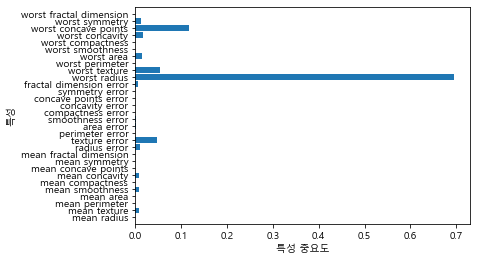

In [24]:
#각 특성의 중요도 평가이지만, 중요도가 낮다고 유용하지 않은 것은 아님.

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


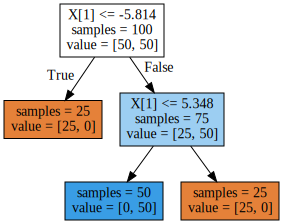

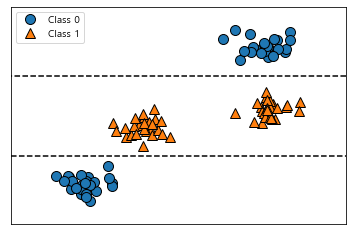

In [25]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

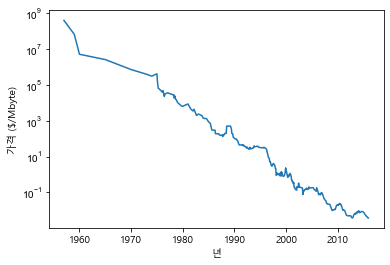

In [26]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape:{}".format(data_test.shape))

#가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape: (202, 3) data_test.shape:(131, 3)


<ipython-input-27-16a2dc462248>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]
<ipython-input-27-16a2dc462248>:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:,np.newaxis]


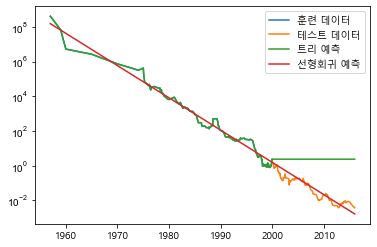

In [28]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

In [29]:
iris = load_iris()
X = iris.data[:, 2:] #꽃의 길이와 넓이
y = iris.target 

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42) 
tree_clf.fit(X, y)

export_graphviz(tree_clf, out_file="iris_tree.dot",feature_names=iris.feature_names[2:],
                class_names=iris.target_names,rounded=True,filled=True)

#Source.from_file("iris_tree.dot")


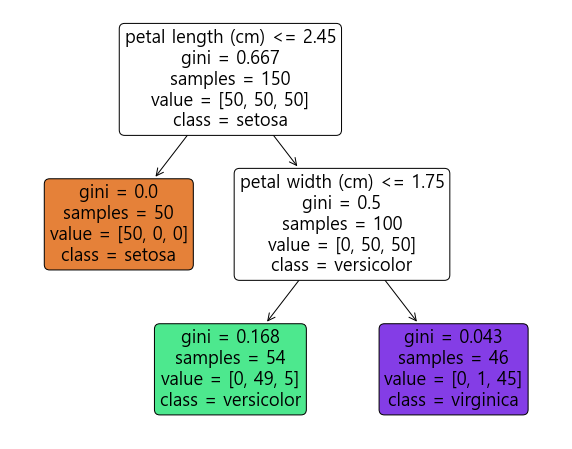

In [30]:
from sklearn.tree import plot_tree

#지니지수 = 엔트로피보다 계산이 빠르다는 장점이 있음.
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2,feature_names=iris.feature_names[2:],
          class_names=iris.target_names)

plt.show()

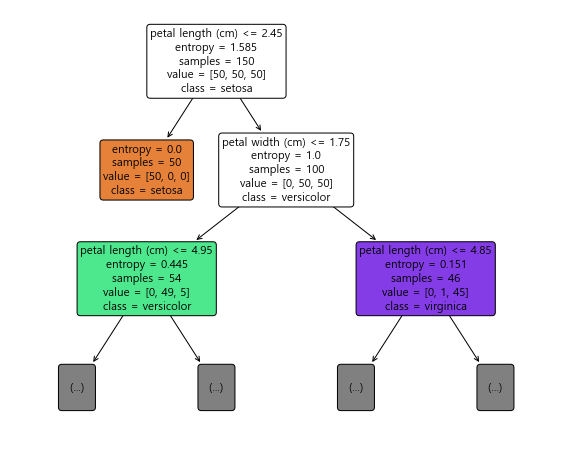

In [34]:
#entropy 엔트로피

tree_clf=DecisionTreeClassifier(criterion='entropy',random_state=42)
tree_clf.fit(X,y)

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2,feature_names=iris.feature_names[2:],
          class_names=iris.target_names)

plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [39]:
#cross_val_score import 해줘야함.
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5 {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10 {:.3f}\n".format(cvscores.mean()))

#randomforest의 경우, 랜덤한 데이터를 뽑아서 정확도를 판단하므로 한번의 값으로 결정트리보다 더 좋다고 판단할 수는 없다.
#5번,10번을 돌렸을 경우에 정확도가 낮아졌기 때문이다.

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV = 5 0.860

테스트 세트 정확도 CV = 10 0.840



In [42]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도:{:.3f}\n".format(dt.score(X_test, y_test)))

cvscores = cross_val_score(dt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5:{:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(dt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10:{:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도:0.880

테스트 세트 정확도 CV = 5:0.860

테스트 세트 정확도 CV = 10:0.850



In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10 {:.3}\n".format(cvscores.mean()))
print(cvscores)

#일반화하기 위해 10번 돌렸음. 정확도 0.910으로 실전에 쓸만한가 고민해볼만 함.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV=10 0.91

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


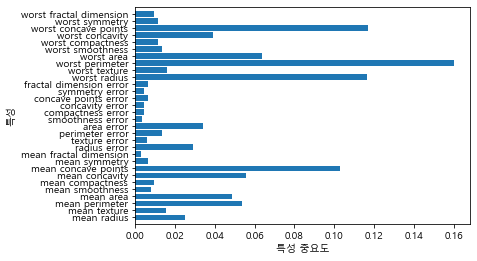

In [46]:
#결정트리에서는 'worst radius'의 중요도가 가장 높았음. 랜덤포레스트의 경우 'worst perimeter'의 중요도가 가장 높음.

plot_feature_importances_cancer(forest)